## Importing Libraries

In [42]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [43]:
# Loading the required data
df=pd.read_csv('stroke_data.csv')
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [45]:
men_with_stroke = df[((df["sex"] == 1.0) & (df["stroke"] == 1))]
len(men_with_stroke)

10230

In [46]:
women_with_stroke = df[((df["sex"] == 0.0) & (df["stroke"] == 1))]
len(women_with_stroke)

10230

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


### Data Exploration

In [48]:
# Assessing for missing values
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
# Drop missing values
df.dropna(inplace=True)

In [50]:
# Assessing for missing values
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [51]:
# Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

# Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
sex,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


It is evident from the above findings that most of the features are categorical in nature and only a few have continuous values.

In [52]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [53]:
cols=['sex', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

************************************************************************************************


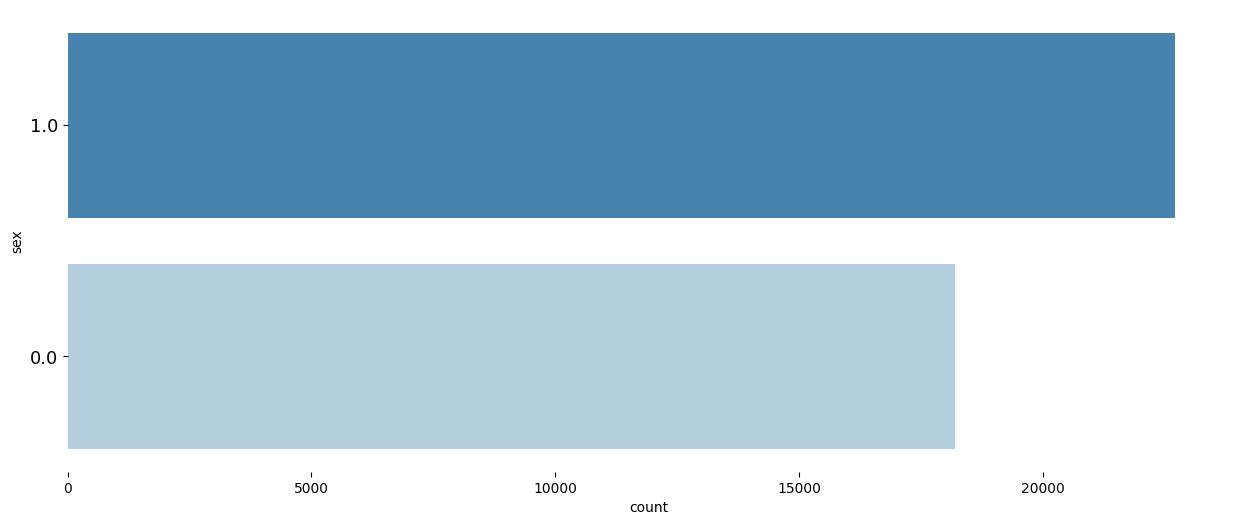

************************************************************************************************


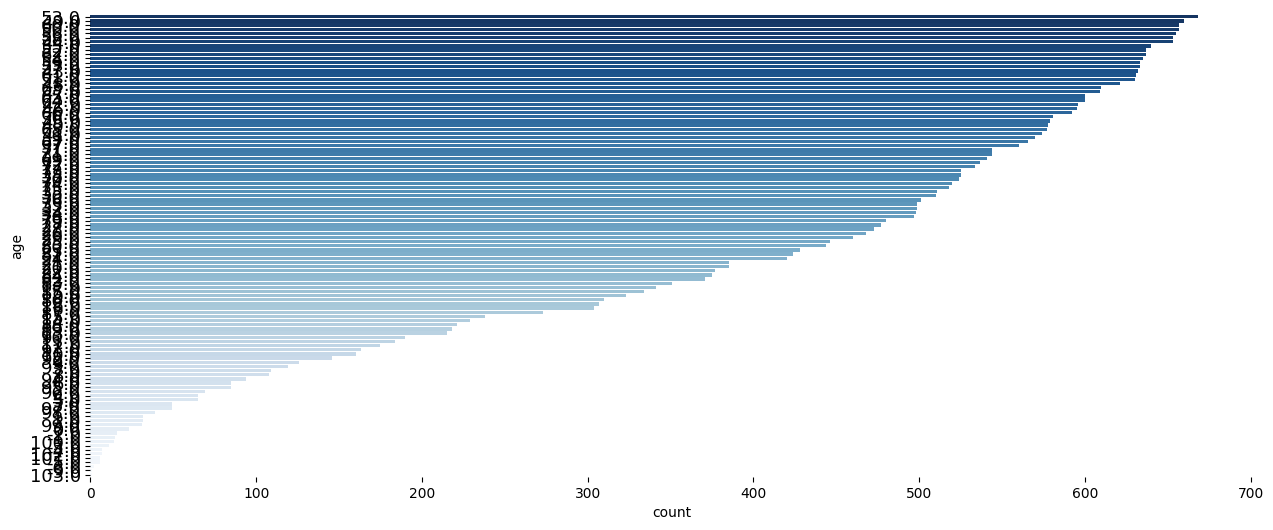

************************************************************************************************


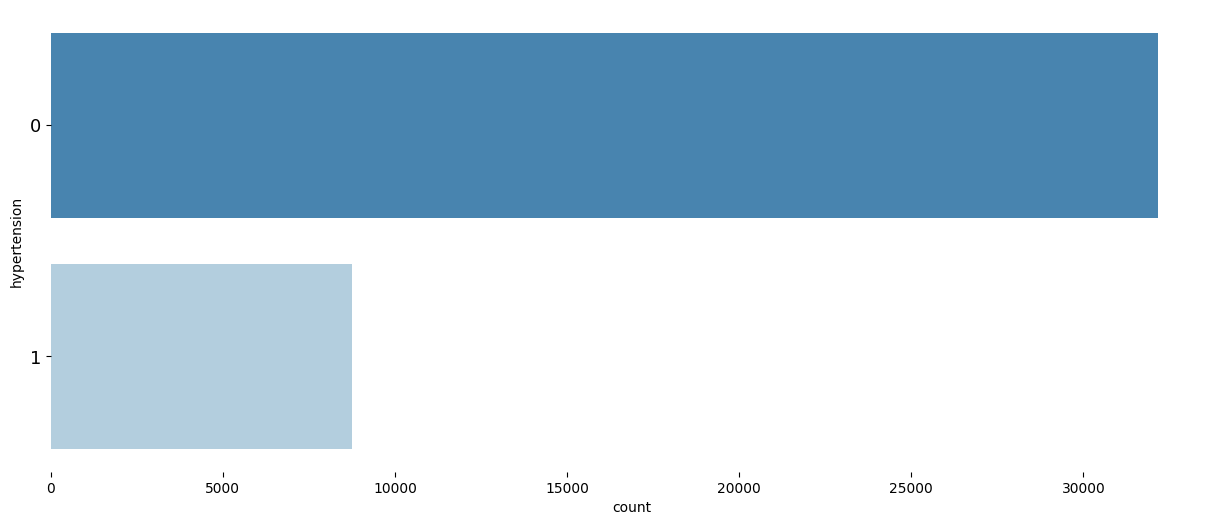

************************************************************************************************


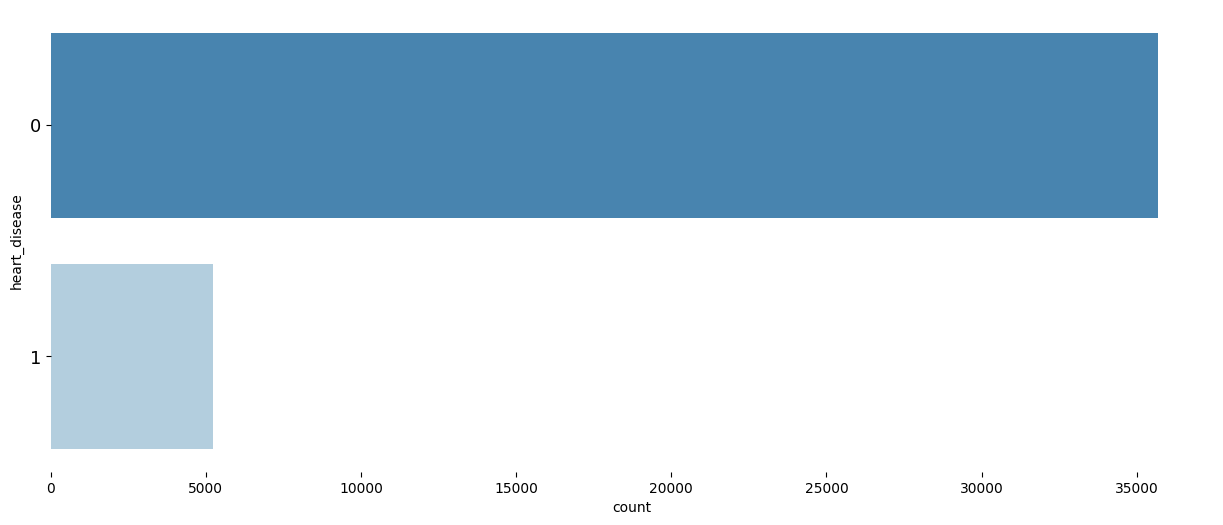

************************************************************************************************


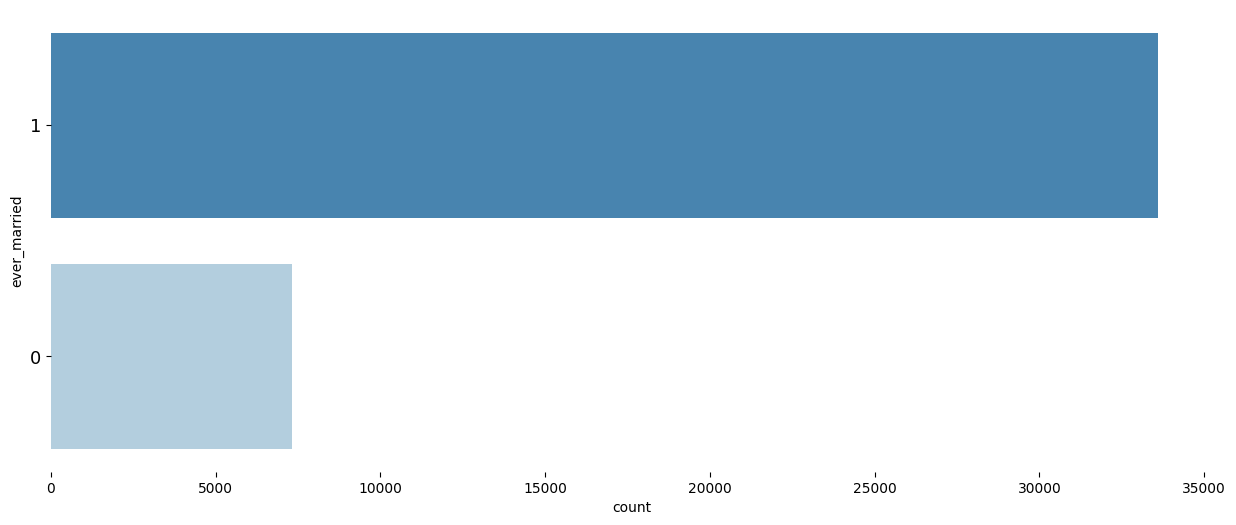

************************************************************************************************


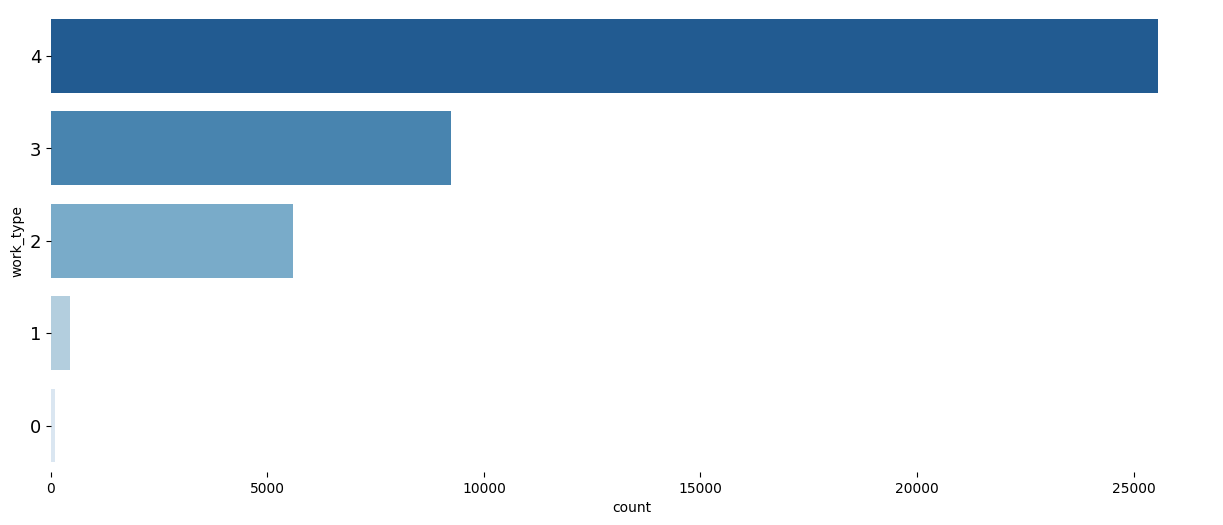

************************************************************************************************


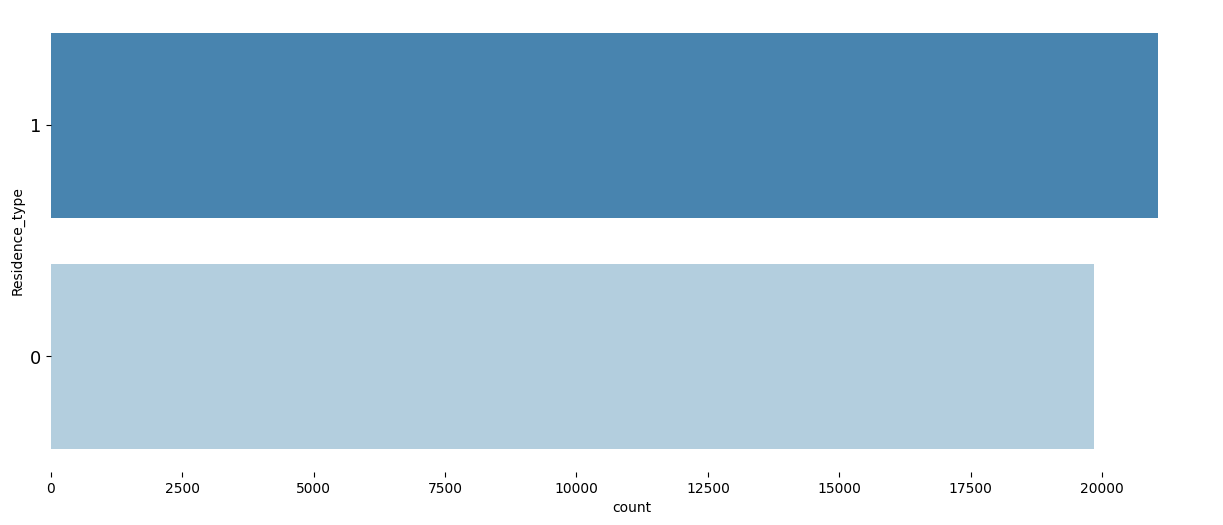

************************************************************************************************


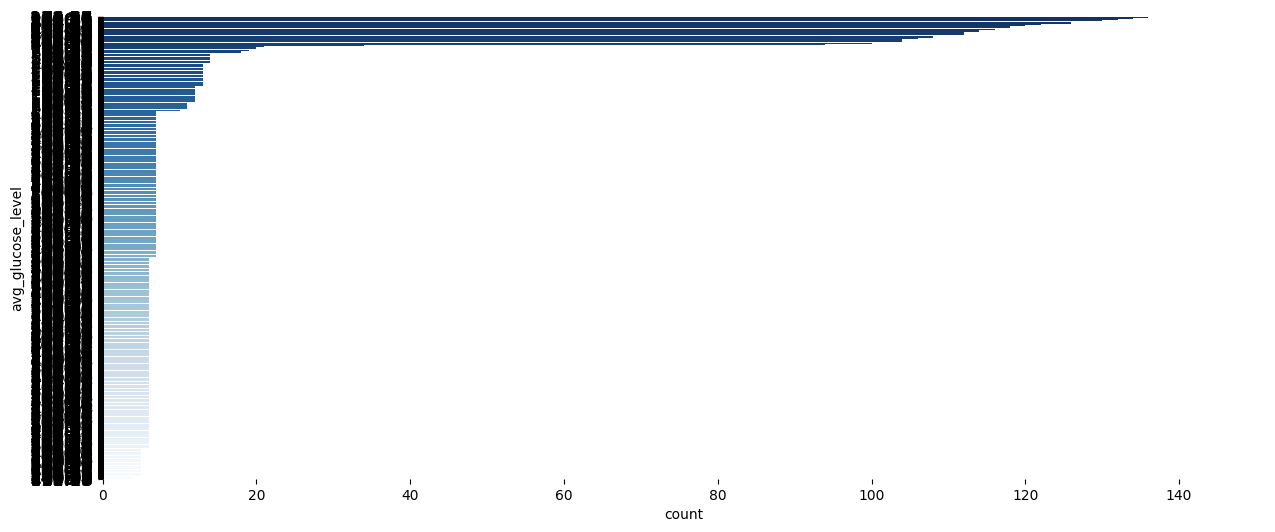

************************************************************************************************


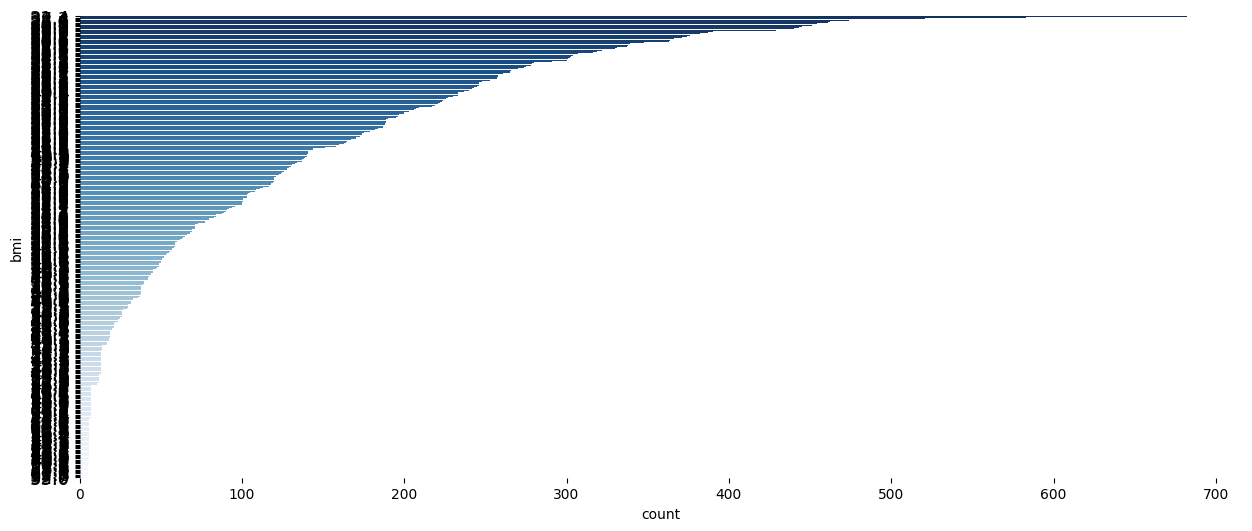

************************************************************************************************


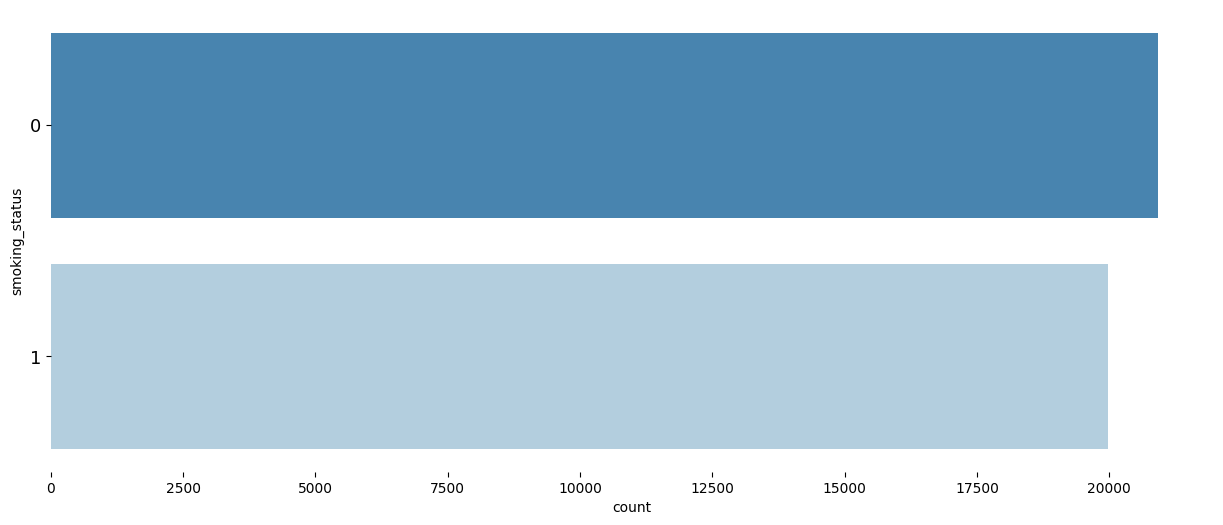

************************************************************************************************


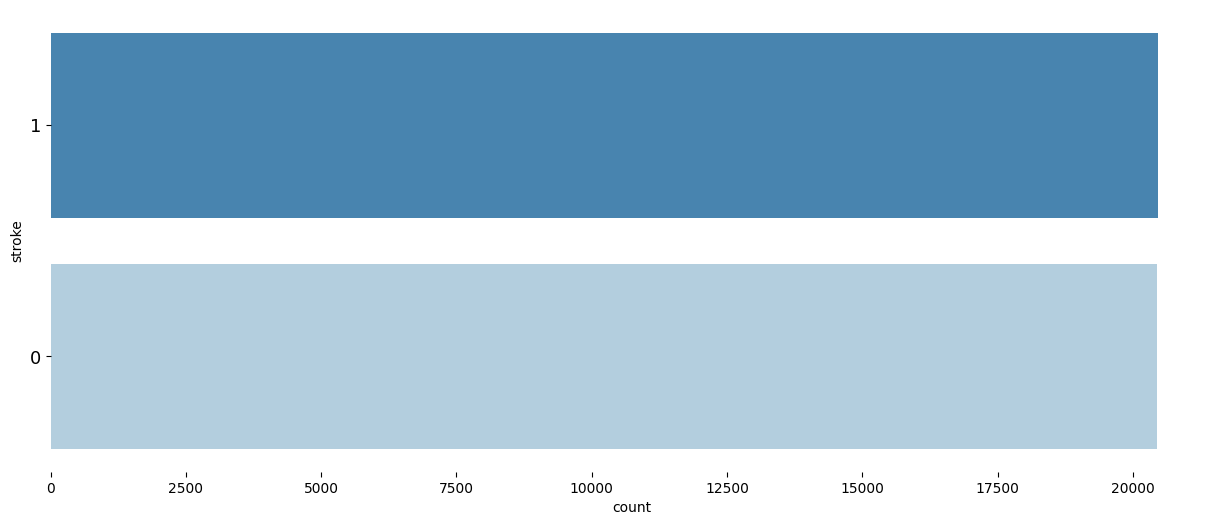

In [54]:
# Count plots for categorical features

for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=13)
  print("************************************************************************************************")
  plt.box(False)
  plt.show()

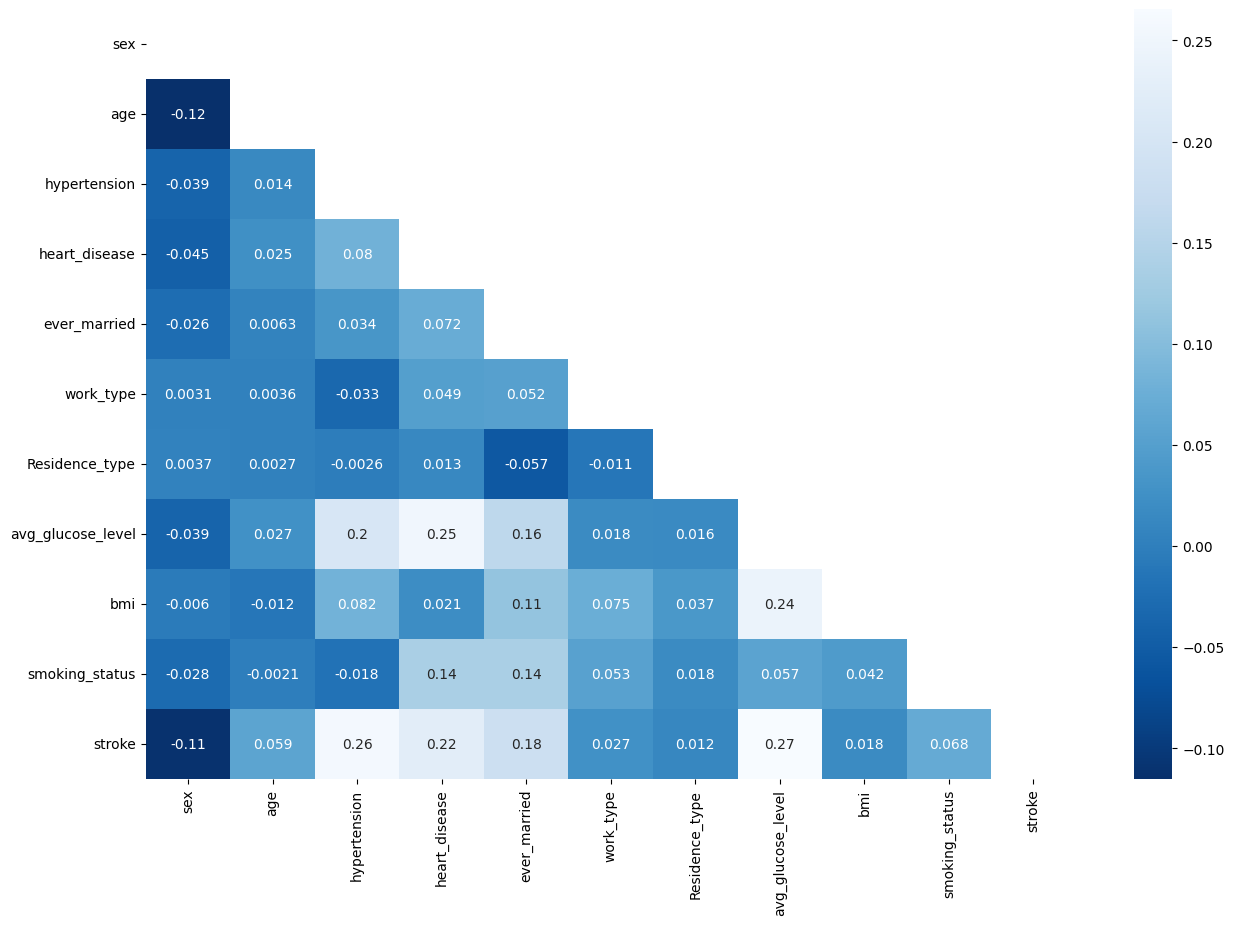

In [55]:
# Building a heatmap using correlation
plt.figure(figsize=(15,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='Blues_r')
plt.show()

In [56]:
df.corr()['stroke'].sort_values()

sex                 -0.111036
Residence_type       0.011754
bmi                  0.018307
work_type            0.026546
age                  0.058536
smoking_status       0.068449
ever_married         0.181698
heart_disease        0.223911
hypertension         0.257156
avg_glucose_level    0.265403
stroke               1.000000
Name: stroke, dtype: float64

Now using this heatmap those features that might not contribute enough to the model depending on their correlation to the target(Stroke) column will be dropped from the dataset

## Feature Engineering

In [57]:
# splitting the data into input data features and target 
X=df.drop(['stroke'],axis=1)
y=df['stroke']

## Train-Test-Split and Scaling

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)
print(X_train.shape)
print(X_test.shape)

(28634, 10)
(12273, 10)


In [59]:
# scaling the data so that comparatively larger values do not make the model biased
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**K-NEAREST NEIGHBOURS**

In [60]:
knn = KNeighborsClassifier()

## Defining a generic model

In [61]:
# Defining a function to standardize the model testing process
cm_vals = {}

def model_train_test(X_test, y_test, X_train=X_train_scaled, model=knn):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("********************************************************************")
    print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
    cm_vals.update({'TN': TN, 'FP': FP, 'FN': FN, 'TP': TP})
    print("********************************************************************")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
    disp.plot()
    return y_pred

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      6135
           1       0.82      0.97      0.89      6138

    accuracy                           0.88     12273
   macro avg       0.89      0.88      0.87     12273
weighted avg       0.89      0.88      0.87     12273

********************************************************************
TN=4799, FP=1336, FN=194, TP=5944
********************************************************************


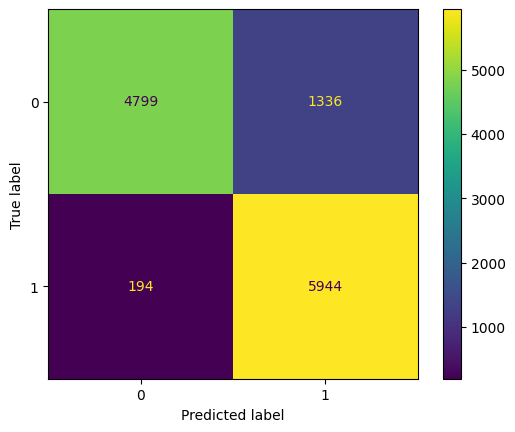

In [62]:
predict_g = model_train_test(X_test_scaled, y_test)

## Fairness through unawareness - Group unaware; dropping the gender column from the training and test data

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     14312
           1       0.81      0.98      0.89     14322

    accuracy                           0.87     28634
   macro avg       0.89      0.87      0.87     28634
weighted avg       0.89      0.87      0.87     28634

********************************************************************
TN=11026, FP=3286, FN=327, TP=13995
********************************************************************


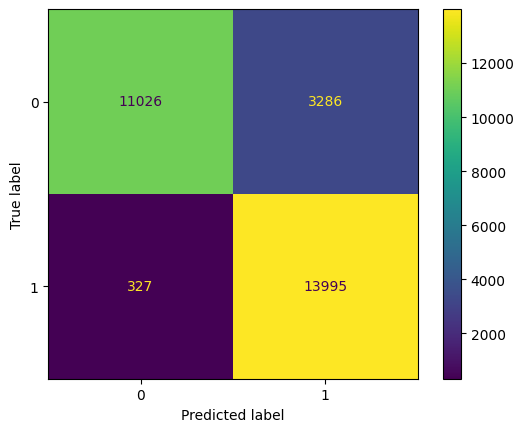

In [63]:
X_train_gb = X_train.drop(columns=['sex'])
X_test_gb = X_test.drop(columns=['sex'])

train_predict_gb= model_train_test(X_test = X_train_gb, y_test=y_train, X_train=X_train_gb)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      6135
           1       0.74      0.93      0.82      6138

    accuracy                           0.80     12273
   macro avg       0.82      0.80      0.80     12273
weighted avg       0.82      0.80      0.80     12273

********************************************************************
TN=4080, FP=2055, FN=415, TP=5723
********************************************************************


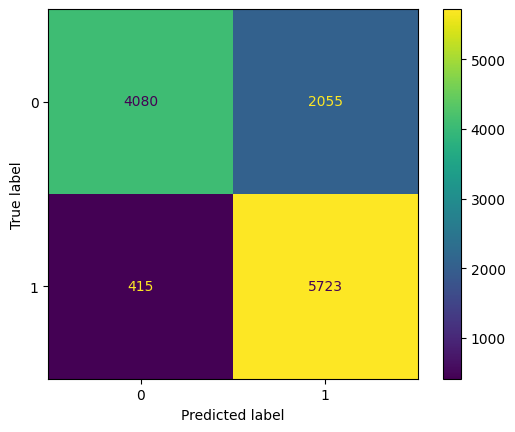

In [64]:
train_predict_gb= model_train_test(X_test_gb, y_test, X_train=X_train_gb)

### Splitting the True and Predicted Values into Male and Female Groups

In [65]:
PROTECTED = "sex"
MEN = 1.0 #men 
WOMEN = 0.0 #women
men_indices = np.where(X_test[PROTECTED] == MEN)[0] 
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

[    1     2     3 ... 12267 12268 12272] No of Men = 6834
[    0     5     6 ... 12269 12270 12271] No of Women = 5439


### Extracting the actual outcomes for the two groups

In [66]:
y_test_m = [y_test.values[i] for i in men_indices]
y_test_f = [y_test.values[i] for i in women_indices]

print(y_test_m, 'y_test_m')
print(y_test_f, 'y_test_f')

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 

### Extracting the predicted outcomes for the two groups

In [67]:
y_predict_m = [predict_g[i] for i in men_indices]
y_predict_f = [predict_g[i] for i in women_indices]

print(y_predict_m, 'y_predict_m')
print(y_predict_f, 'y_predict_f')

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 

In [68]:
# Creating the X_test (which represents the test data) variable for men and women

X_test_m = [X_test.values[i] for i in men_indices]
X_test_f = [X_test.values[i] for i in women_indices]

              precision    recall  f1-score   support

           0       0.19      0.01      0.02      2368
           1       0.56      0.97      0.71      3071

    accuracy                           0.55      5439
   macro avg       0.37      0.49      0.36      5439
weighted avg       0.40      0.55      0.41      5439

********************************************************************
TN=21, FP=2347, FN=92, TP=2979
********************************************************************


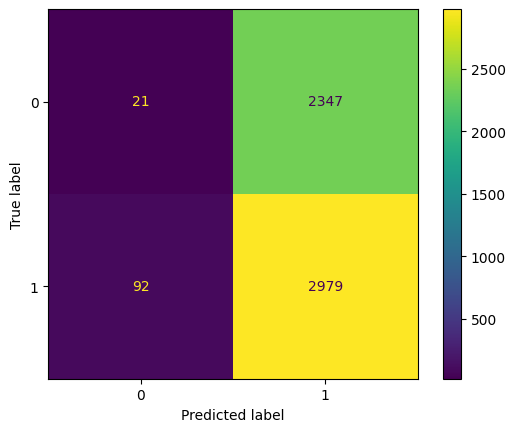

In [69]:
# Calculating the Accuracy, Precision and Recall scores for women
test_predict_f = model_train_test(X_test_f, y_test_f)

In [70]:
# Demographic parity for women
women_positive_rate = (cm_vals['TP'] + cm_vals['FP']) / (cm_vals['TP'] + cm_vals['FP'] + cm_vals['TN'] + cm_vals['FN'])
print(f"Positive rate for women getting stroke: {women_positive_rate*100:.1f}%")

Positive rate for women getting stroke: 97.9%


              precision    recall  f1-score   support

           0       0.43      0.03      0.06      3767
           1       0.44      0.95      0.61      3067

    accuracy                           0.44      6834
   macro avg       0.44      0.49      0.33      6834
weighted avg       0.43      0.44      0.30      6834

********************************************************************
TN=112, FP=3655, FN=150, TP=2917
********************************************************************


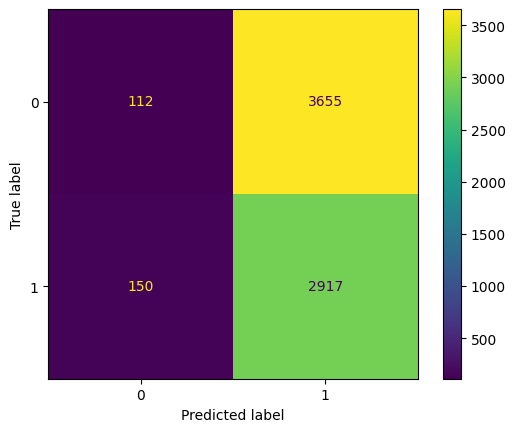

In [71]:
# Calculating the Accuracy, Precision and Recall scores for men
test_predict_m = model_train_test(X_test_m, y_test_m)

In [72]:
# Demographic parity for men
men_positive_rate = (cm_vals['TP'] + cm_vals['FP']) / (cm_vals['TP'] + cm_vals['FP'] + cm_vals['TN'] + cm_vals['FN'])
print(f"Positive rate for men getting stroke: {men_positive_rate*100:.1f}%")

Positive rate for men getting stroke: 96.2%


## Group Unawareness

### Feature Engineering

In [73]:
# Splitting the data into input data features and target 
X=df.drop(['stroke', 'sex'],axis=1)
y=df['stroke']

### Train-Test-Split and Scaling

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)
print(X_train)
print(X_test.shape)

        age  hypertension  heart_disease  ever_married  work_type  \
20934  22.0             1              0             0          4   
14360  61.0             0              0             0          2   
10451  72.0             1              0             0          4   
26386  23.0             0              0             1          4   
24647  22.0             0              0             1          4   
...     ...           ...            ...           ...        ...   
39184  48.0             0              0             0          4   
33213  24.0             0              0             1          4   
11070  12.0             0              0             1          4   
21013  39.0             0              1             1          4   
1777   39.0             1              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  
20934               1              70.03  78.0               1  
14360               1              70.30 

In [75]:
# Scaling the data so that comparatively larger values do not make the model biased
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**K-NEAREST NEIGHBOURS**

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6135
           1       0.86      0.99      0.92      6138

    accuracy                           0.91     12273
   macro avg       0.92      0.91      0.91     12273
weighted avg       0.92      0.91      0.91     12273

********************************************************************
TN=5124, FP=1011, FN=43, TP=6095
********************************************************************


array([0, 0, 1, ..., 1, 0, 1])

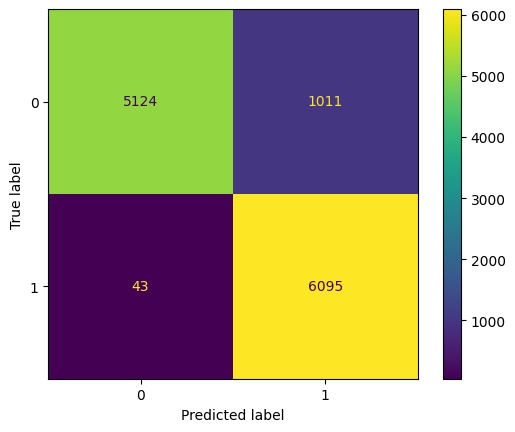

In [76]:
model_train_test(X_test_scaled, y_test, X_train=X_train_scaled)